In [53]:
#Importing Packages
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [54]:
#open data 
FTSE100 = pd.read_csv('/content/drive/MyDrive/Stock Data/FTSE100_R.csv')
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392
1,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968
2,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904
3,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232
4,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384
...,...,...,...,...,...,...
3235,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128
3236,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912
3237,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744
3238,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664


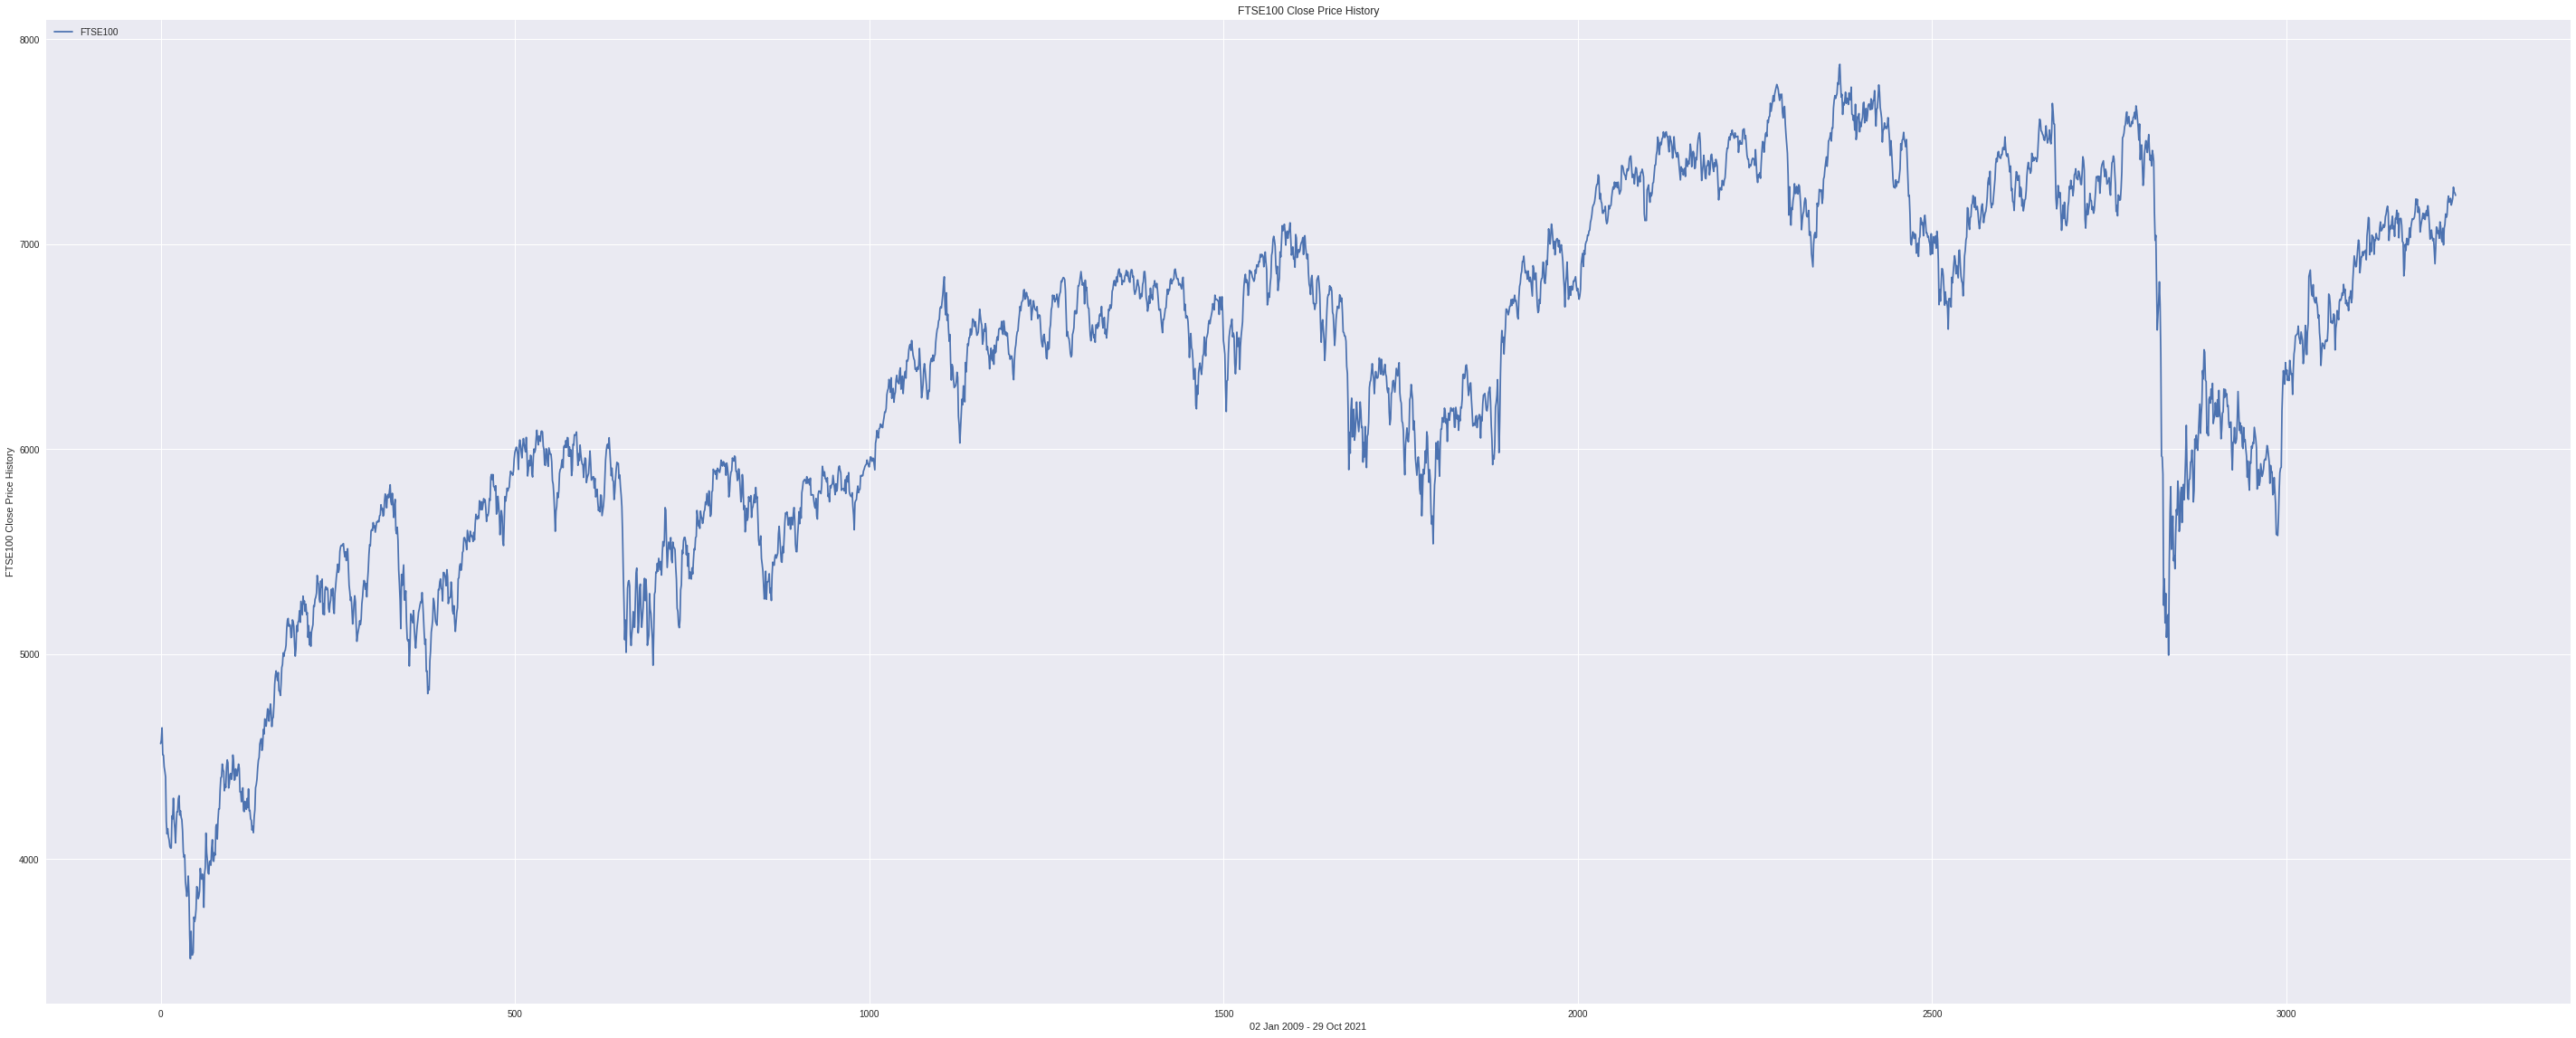

In [55]:
#Visual representation of the data 
plt.figure(figsize = (50, 20))
plt.plot(FTSE100['Close Price'], label = 'FTSE100')
plt.title('FTSE100 Close Price History')
plt.xlabel('02 Jan 2009 - 29 Oct 2021')
plt.ylabel('FTSE100 Close Price History')
plt.legend(loc = 'upper left')
plt.show()

In [56]:
#30 Day Moving Avaerge (SMA)
sma30 = pd.DataFrame()
sma30['Close Price'] = FTSE100['Close Price'].rolling(window = 30).mean()

In [57]:
#90 Day Moving Avaerge (SMA)
sma100 = pd.DataFrame()
sma100['Close Price'] = FTSE100['Close Price'].rolling(window = 100).mean()

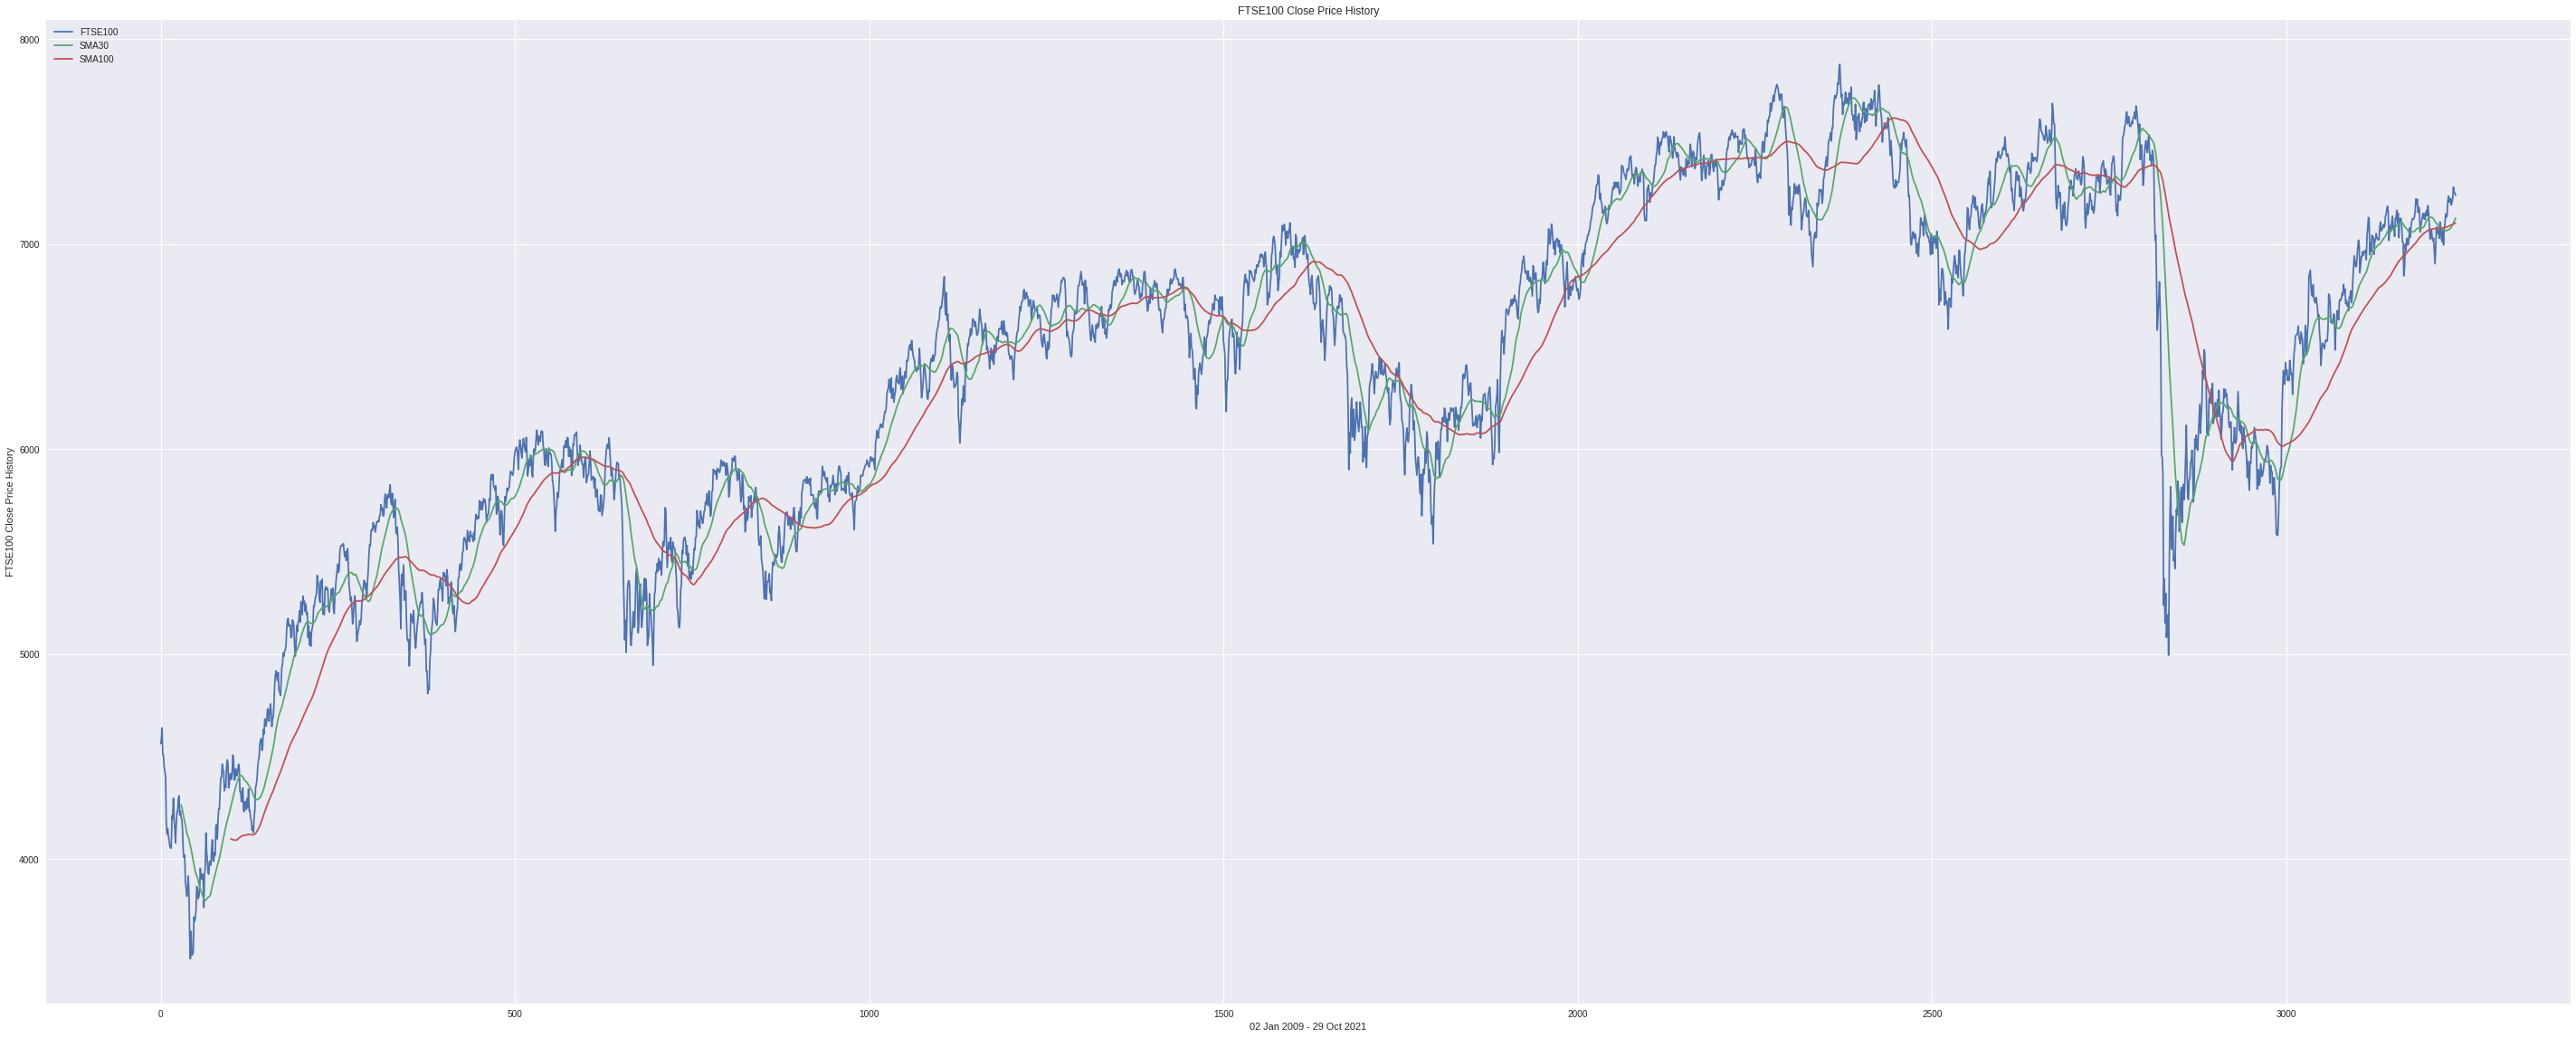

In [58]:
#Visualise Averages
plt.figure(figsize = (50, 20))
plt.plot(FTSE100['Close Price'], label = 'FTSE100')
plt.plot(sma30['Close Price'], label = 'SMA30')
plt.plot(sma100['Close Price'], label = 'SMA100')
plt.title('FTSE100 Close Price History')
plt.xlabel('02 Jan 2009 - 29 Oct 2021')
plt.ylabel('FTSE100 Close Price History')
plt.legend(loc = 'upper left')
plt.show()

In [59]:
#New Data
price_data = pd.DataFrame()
price_data['FTSE100'] = FTSE100['Close Price']
price_data['SMA30'] = sma30['Close Price']
price_data['SMA100'] = sma100['Close Price']
price_data

,FTSE100,SMA30,SMA100
0,4561.80,NaN,NaN
1,4579.60,NaN,NaN
2,4638.90,NaN,NaN
3,4507.50,NaN,NaN
4,4505.40,NaN,NaN
...,...,...,...
3235,7222.82,7094.441667,7096.1686
3236,7277.62,7102.560333,7098.1726
3237,7253.27,7110.453000,7099.7544
3238,7249.47,7117.852667,7101.4390


In [60]:
#Buys/Sell Signals
def Signal(price_data):
  sigbuy = []
  sigsell = []
  f = -1

  for i in range(len(price_data)):
    if price_data['SMA30'][i] > price_data['SMA100'][i]:
      if f != 1:
        sigbuy.append(price_data['FTSE100'][i])
        sigsell.append(np.nan)
        f = 1 
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    elif price_data['SMA30'][i] < price_data['SMA100'][i]:
      if f != 0:
        sigbuy.append(np.nan)
        sigsell.append(price_data['FTSE100'][i])
        f = 0
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    else:
      sigbuy.append(np.nan)
      sigsell.append(np.nan)
  
  return(sigbuy, sigsell)


In [61]:
#Buy/Sell DataFrame
s = Signal(price_data)
price_data['Buy Signal Price'] = s[0]
price_data['Sell Signal Price'] = s[1]
price_data

,FTSE100,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,4561.80,NaN,NaN,NaN,NaN
1,4579.60,NaN,NaN,NaN,NaN
2,4638.90,NaN,NaN,NaN,NaN
3,4507.50,NaN,NaN,NaN,NaN
4,4505.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3235,7222.82,7094.441667,7096.1686,NaN,NaN
3236,7277.62,7102.560333,7098.1726,7277.62,NaN
3237,7253.27,7110.453000,7099.7544,NaN,NaN
3238,7249.47,7117.852667,7101.4390,NaN,NaN


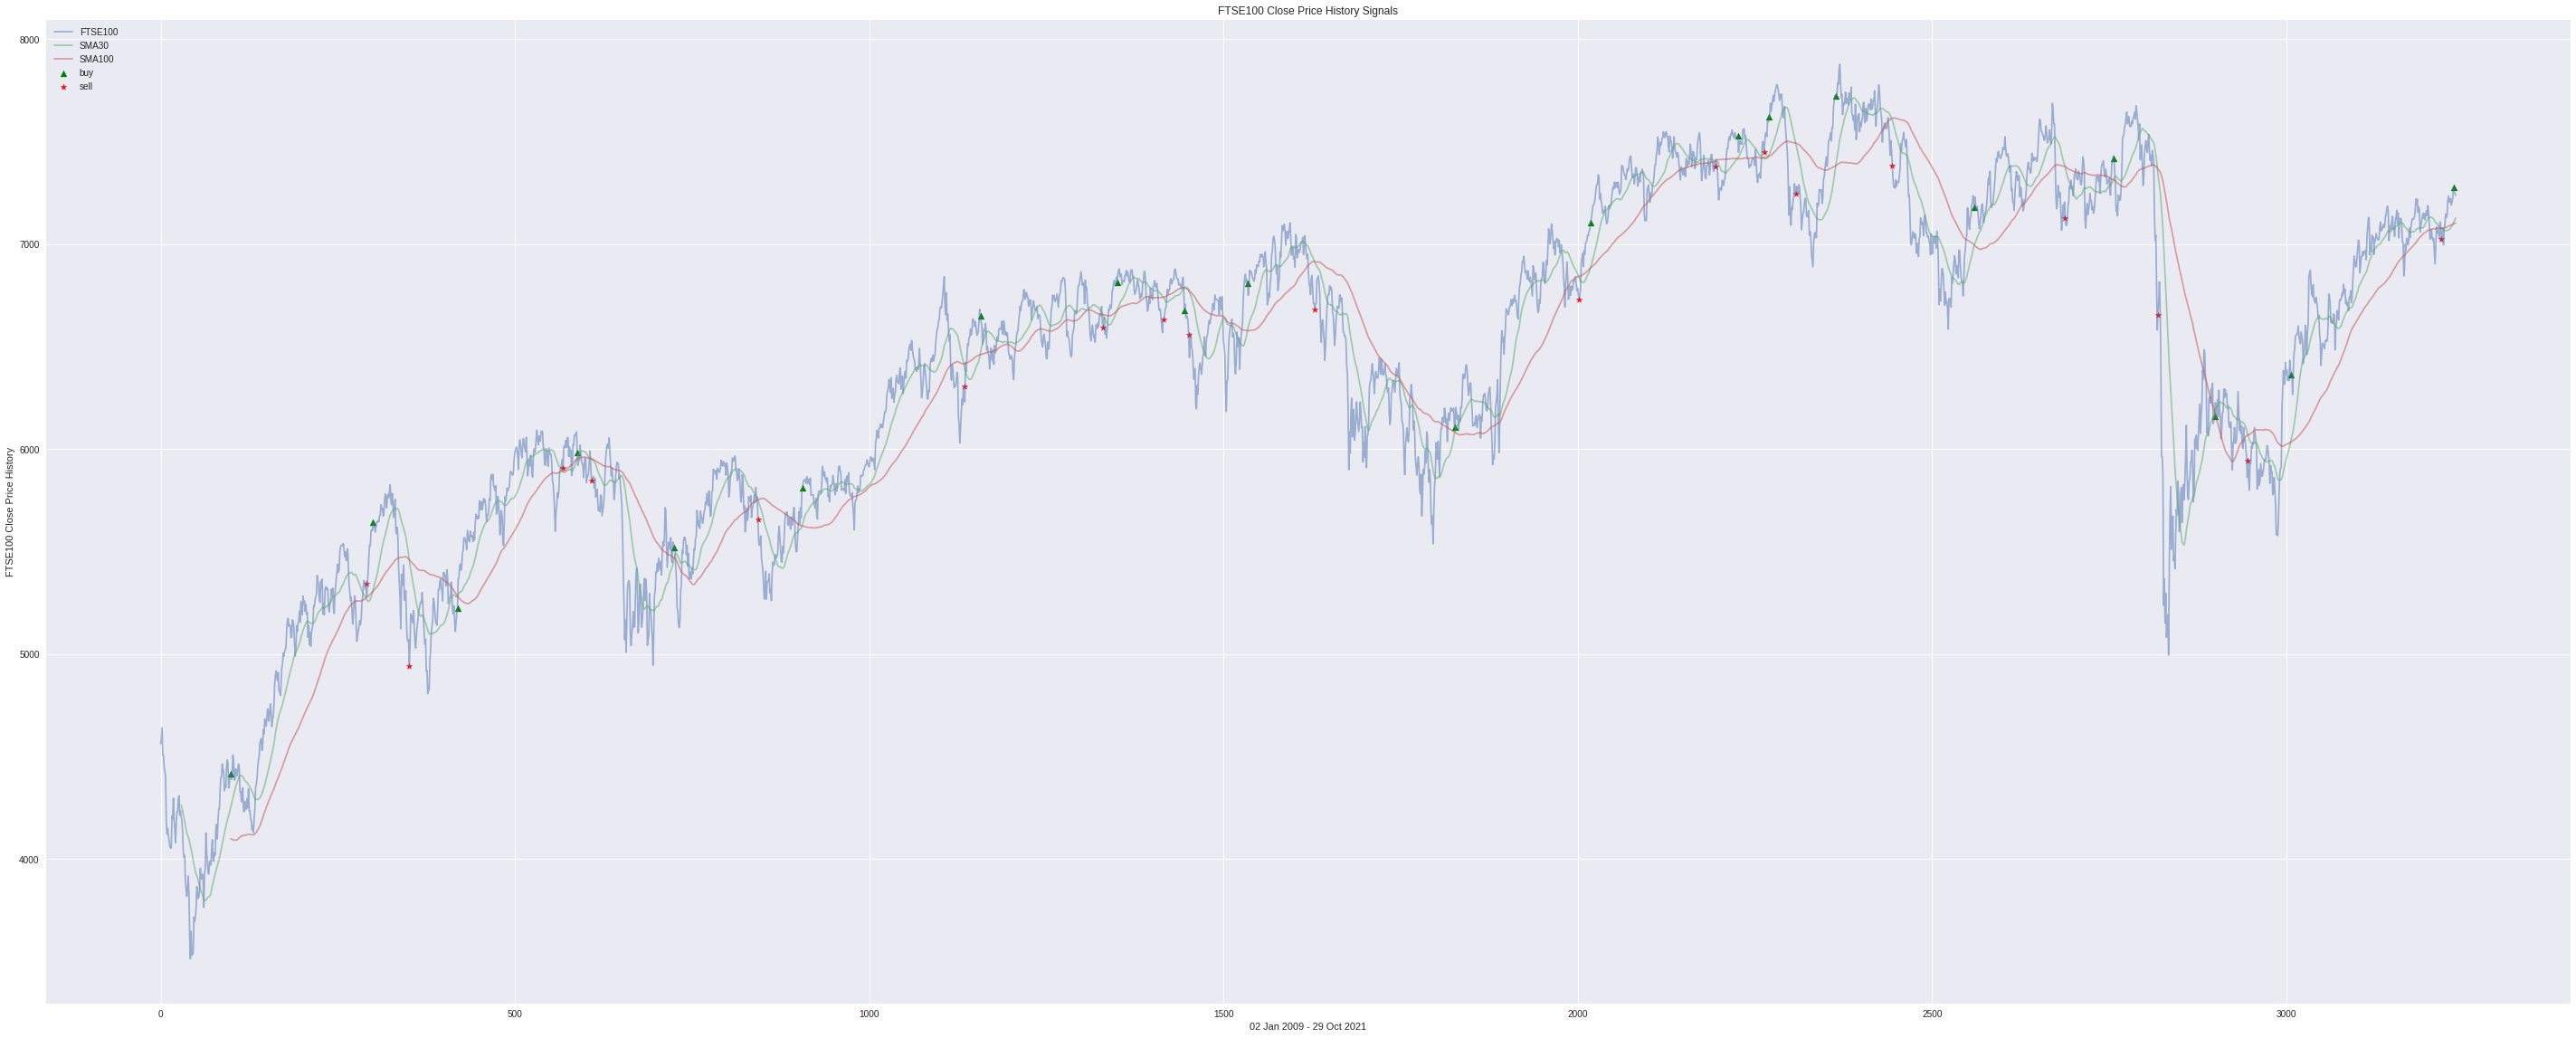

In [62]:
plt.figure(figsize = (50, 20))
plt.plot(price_data['FTSE100'], label = 'FTSE100', alpha = 0.5)
plt.plot(price_data['SMA30'], label = 'SMA30', alpha = 0.5)
plt.plot(price_data['SMA100'], label = 'SMA100', alpha = 0.5)
plt.scatter(price_data.index, price_data['Buy Signal Price'], label = 'buy', marker = '^', color = 'green')
plt.scatter(price_data.index, price_data['Sell Signal Price'], label = 'sell', marker = '*', color = 'red')
plt.title('FTSE100 Close Price History Signals')
plt.xlabel('02 Jan 2009 - 29 Oct 2021')
plt.ylabel('FTSE100 Close Price History')
plt.legend(loc = 'upper left')
plt.show()